In [1]:
# Import Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statistics as st
import scipy.stats as stats
import random
pd.set_option('display.max_rows', None)
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings("ignore")

In [3]:
av=pd.DataFrame({"Ages":[42,44,62,35,20,30,56,20,23,41,55,22,31,27,66,21,18,24,42,25,32,50,31,26,36,39,40,18,36,22]})
av

,Ages
0,42
1,44
2,62
3,35
4,20
5,30
6,56
7,20
8,23
9,41


#### Q1. Compute the mean, median and the mode of the data

In [6]:
print("Mean:",av["Ages"].mean())
print("Median:",st.median(av["Ages"]))
print("Mode:",st.mode(av["Ages"]))

Mean: 34.46666666666667
Median: 31.5
Mode: 42


#### Q2. Compute the range , variance and standard deviation of customer ages

In [7]:
print("The range of the data is",av["Ages"].max()-av["Ages"].min())
print("Variance:",av["Ages"].var())
print("Standard Deviation:",av["Ages"].std())

The range of the data is 48
Variance: 177.36091954022984
Standard Deviation: 13.317691974971858


#### Q3. Find the mean deviation for the data .

In [8]:
md = sum(abs(av["Ages"]-av["Ages"].mean()))/len(av)

In [9]:
print("Mean Deviation:",md)

Mean Deviation: 10.764444444444443


#### Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data.

In [10]:
skew = 3*(av["Ages"].mean()-av["Ages"].median())/av["Ages"].std()

In [11]:
print("Skewness:",skew)

Skewness: 0.668283965173989


* The skewness of this data is 0.67
* The distribution is positively skewed as the pearson coefficient of skewness is positive

#### Q5. Count the number of data values that fall within two standard deviations of the mean. Compare this with the answer from Chebyshev’s Theorem.

Chebyshev's Theorem is stated as follows:

"For any continuous or discrete dataset, regardless of its shape, at least (1 - 1/k^2) of the data falls within k standard deviations from the mean, where k is any positive constant greater than 1."

In other words, for any value of k greater than 1, at least (1 - 1/k^2) of the data must fall within k standard deviations from the mean. This theorem provides a worst-case scenario estimate of the proportion of data within a given range.

In [13]:
mean = av["Ages"].mean()
std = av["Ages"].std()
lb = mean - (2* std)
ub = mean + (2* std)
count = sum((av["Ages"]>lb) & (av["Ages"]<ub))
percentage = (count/len(av["Ages"]))*100
k = 2
Chebyshev_Theorem = (1 - (1/k**2))*100

In [14]:
print("Number of values between two standard deviation:",count)
print("Percentage of values in two standard deviation:",percentage)
print("Percentage of values in two standard deviation (Chebyshev's Theorem):",Chebyshev_Theorem)

Number of values between two standard deviation: 28
Percentage of values in two standard deviation: 93.33333333333333
Percentage of values in two standard deviation (Chebyshev's Theorem): 75.0


#### Q6. Find the three quartiles and the interquartile range (IQR).

In [15]:
print("Quartile 1:",np.quantile(av["Ages"],0.25))
print("Quartile 2:",np.quantile(av["Ages"],0.5))
print("Quartile 3:",np.quantile(av["Ages"],0.75))
print("Interquartile Range(IQR):",np.quantile(av,0.75)-np.quantile(av,0.25))

Quartile 1: 23.25
Quartile 2: 31.5
Quartile 3: 41.75
Interquartile Range(IQR): 18.5


#### Q7. Are there any outliers in the data set ?

In [17]:
q1=np.quantile(av["Ages"],0.25)
q3=np.quantile(av["Ages"],0.75)
iqr=q3-q1
ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)
print(av[(av["Ages"]<ll) | (av["Ages"]>ul)])

Empty DataFrame
Columns: [Ages]
Index: []


* There are no outliers in the dataset

#### Q8. Draw a boxplot of the dataset to confirm .

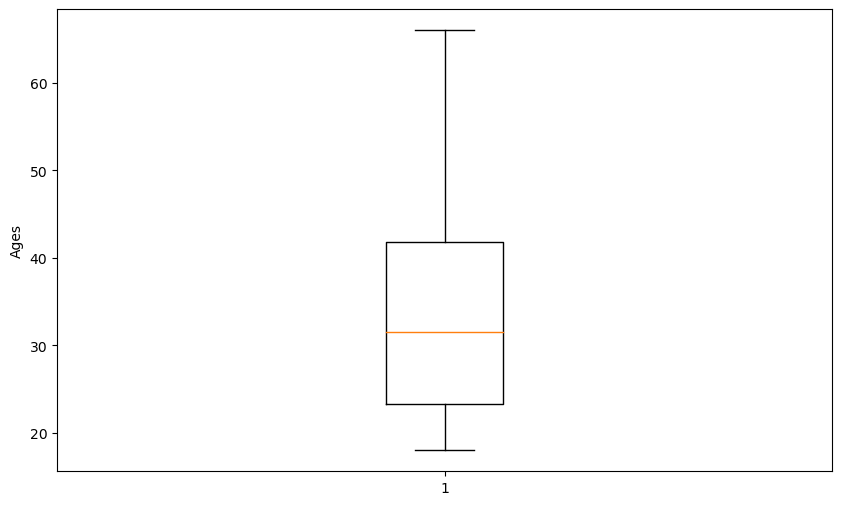

In [18]:
plt.boxplot(av["Ages"])
plt.ylabel("Ages")
plt.show()

#### Q9. Find the percentile rank of the datapoint 50.

In [20]:
av["Percentile Rank"] = av["Ages"].rank(pct=True)
av[av["Ages"]==50]["Percentile Rank"]

21    0.866667
Name: Percentile Rank, dtype: float64

* The percentile rank of the datapoint 50 is 0.86

#### Q10. What is the probability that a person ordering an EV scooter is above 50 years old?

In [21]:
p_above_50 = sum(av["Ages"]>50)
total_p = len(av)
prob_above_50 = p_above_50/total_p
print("The number of person ordering an EV scooter is above 50 years old is",p_above_50)
print("The probability that a person ordering an EV scooter is above 50 years old is ",prob_above_50)

The number of person ordering an EV scooter is above 50 years old is 4
The probability that a person ordering an EV scooter is above 50 years old is  0.13333333333333333


#### Q11. Create a frequency distribution for the data and visualize it appropriately

In [22]:
av["Ages"].value_counts()

42    2
36    2
20    2
22    2
31    2
18    2
21    1
39    1
26    1
50    1
32    1
25    1
24    1
27    1
66    1
44    1
55    1
41    1
23    1
56    1
30    1
35    1
62    1
40    1
Name: Ages, dtype: int64

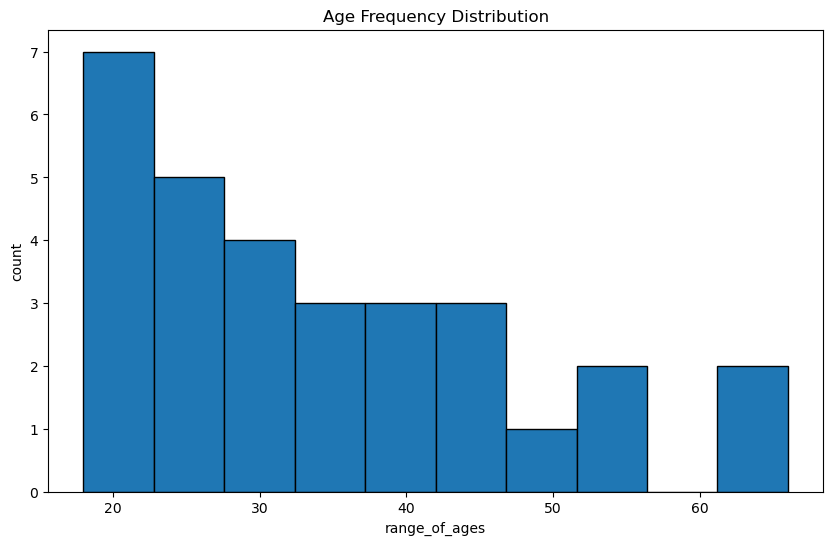

In [23]:
plt.hist(av["Ages"],edgecolor="black")
plt.xlabel("range_of_ages")
plt.ylabel("count")
plt.title("Age Frequency Distribution")
plt.show()

* people in age group 18-23 prefers EV vehicle mostly
* pepole in age group 57-61 prefers EV vehicle less

#### Q12. Create a probability distribution of the data and visualize it appropriately.

In [25]:
values, value_counts = np.unique(av["Ages"], return_counts=True)
probability = value_counts / len(av)
prob = pd.DataFrame({"Value":values,"Probability":probability})
prob

,Value,Probability
0,18,0.066667
1,20,0.066667
2,21,0.033333
3,22,0.066667
4,23,0.033333
5,24,0.033333
6,25,0.033333
7,26,0.033333
8,27,0.033333
9,30,0.033333


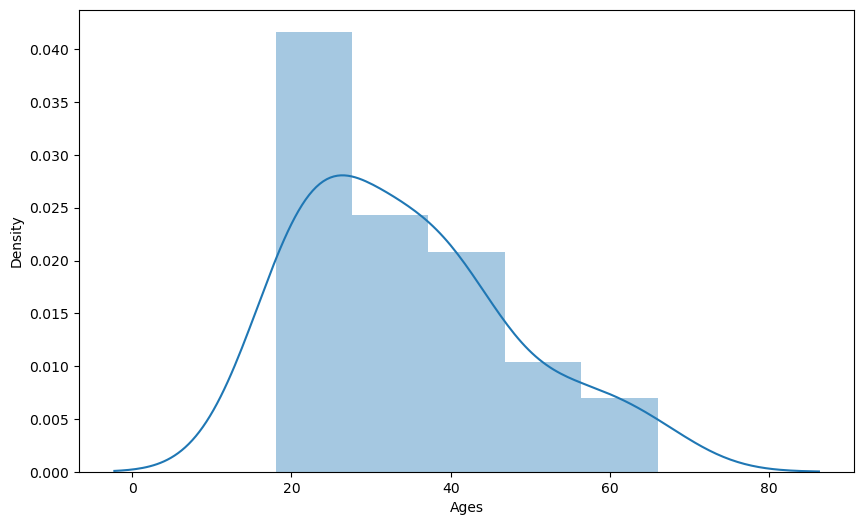

In [26]:
sns.distplot(av["Ages"])
plt.show()

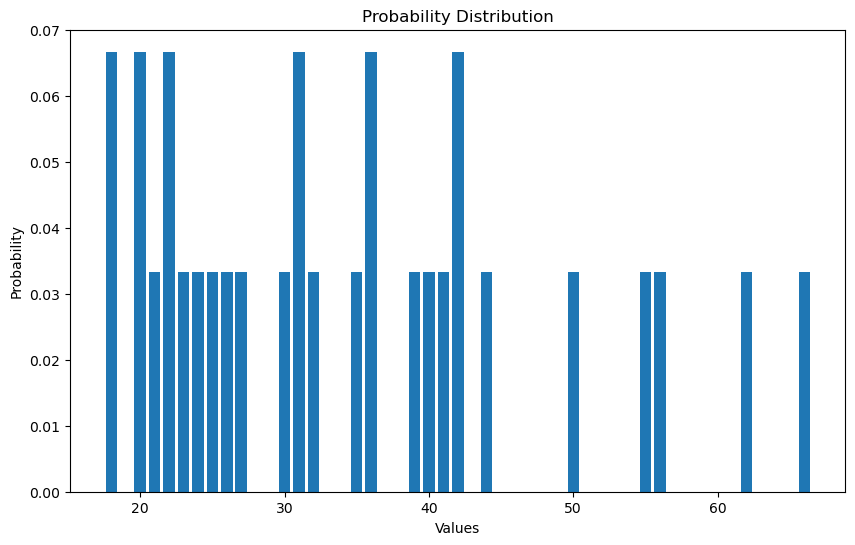

In [36]:
plt.bar(prob["Value"],prob["Probability"])
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Probability Distribution')
plt.show()

* probability of people in age group 18-25 prefers EV vehicle is very high 

#### Q13. What is the shape of the distribution of this dataset? Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each. Create a sampling distribution of the mean age of customers. Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. State your observations. Does it corroborate the Central Limit Theorem?

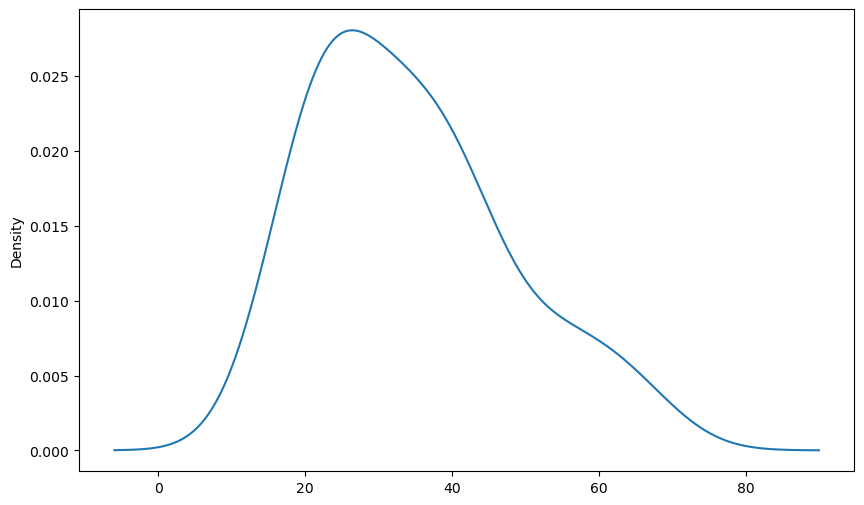

In [34]:
av["Ages"].plot(kind="kde")
plt.show()

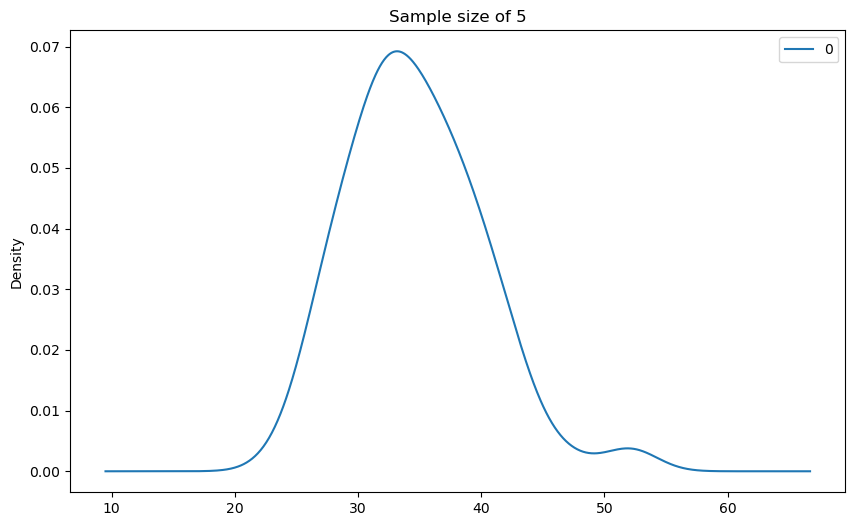

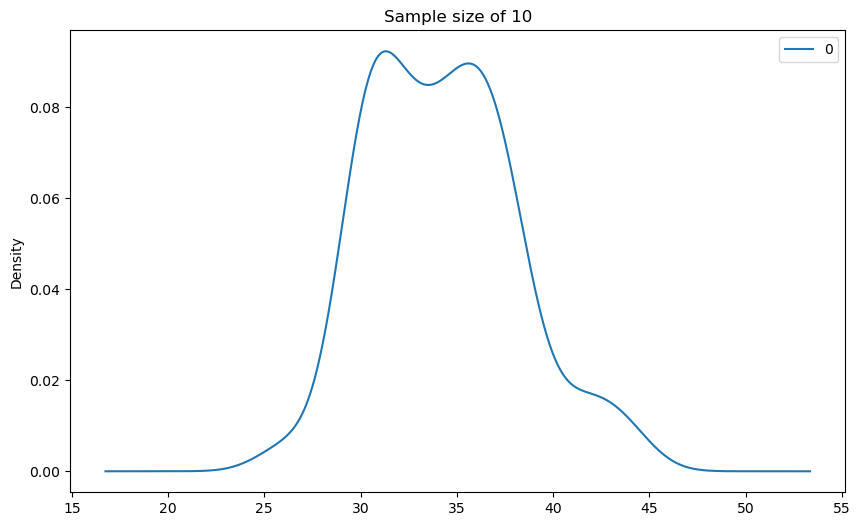

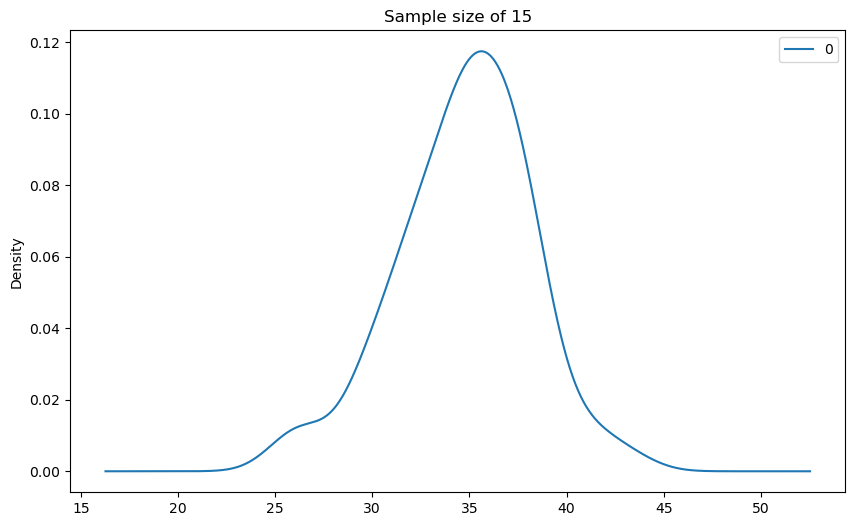

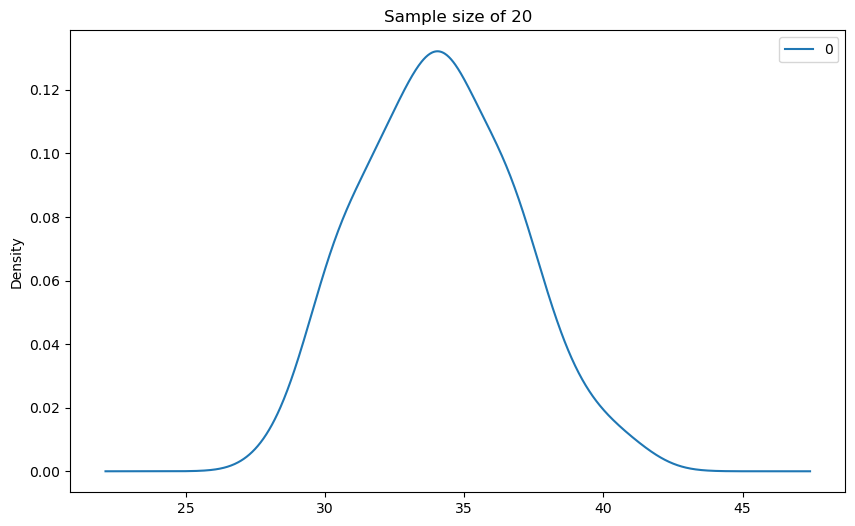

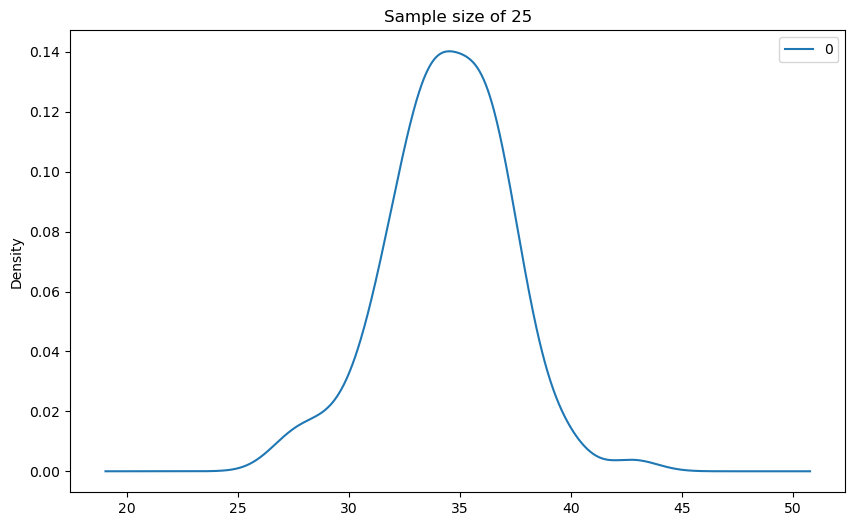

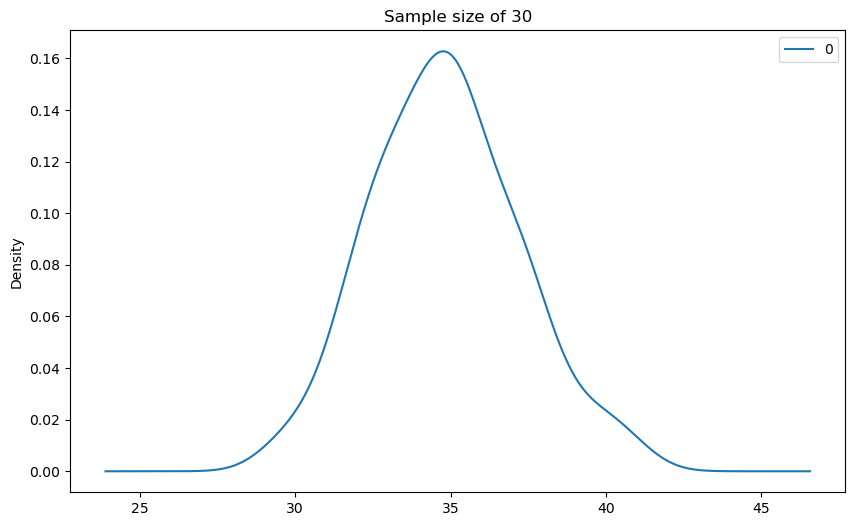

In [33]:
for i in [5,10,15,20,25,30]:
    sample=[]
    sample_mean=[]
    for j in range(100):
        sample.append(random.choices(av["Ages"],k=i))
    for k in sample:
        sample_mean.append(np.mean(k))
    pd.DataFrame(sample_mean).plot(kind="kde")
    plt.title("Sample size of "+str(i))
    plt.show()

* From the first plot we can see that the data set is right skewed.
* But the plot created from the mean of hundred samples of sample size 5,10,15,20,25 and 30 obtained from the original dataset is normally skewed.
* Hence this corroborate with the Central Limit Theorem

#### Q14. Treat this dataset as a binomial distribution where p is the probability that a person ordering an EV is above 50 years age. What is the probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age?

In [35]:
p = sum(av["Ages"]>50)/len(av)
n = 10
r=6
stats.binom.pmf(r,n,p)

0.0006656716898846715

* The probability that out of a random sample of 10 buyers exactly 6 are above 50 years of age is 0.0006 or near zero

#### Q15. A study claims that 10% of all customers for an EV scooter are above 50 years of age. Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age.

In [36]:
p=0.1
n=300
r=25
stats.binom.pmf(r,n,p)

0.0509860415314796

* the probability that in a random sample of 300 prospective customers exactly 25 will be above 50 years of age = 0.05

#### Q16. Compute a 95% Confidence Interval for the true mean age of the population of EV scooter buyers for the dataset using appropriate distribution.( State reasons as to why did you use a z or t distribution)

In [37]:
xbar = av["Ages"].mean()
n = len(av["Ages"])
s = av["Ages"].std()
t_alpha_2 = stats.t.isf(0.025,df=n-1)
lb = xbar - (t_alpha_2*(s/np.sqrt(n)))
ub = xbar + (t_alpha_2*(s/np.sqrt(n)))
print("The 95% Confidence Interval (using t-distribution) is",lb,"and",ub)

The 95% Confidence Interval (using t-distribution) is 29.493758755758076 and 39.43957457757526


* We are using t-distribution here instead of z-distribution because
1. We don't have the population standard deviation hear
2. And the sample size is equal to 30

#### Q17. A data scientist wants to estimate with 95% confidence the proportion of people who own an EV in the population. A recent study showed that 20% of people interviewed had an EV. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.

In [38]:
# margin of error = z*  ((pe*(1-pe))/n)**0.5
# n = ((z**2) * (pe*(1-pe)))/(me**2)
z = 1.96
me = 0.02
pe = 0.2
n = round(((z**2) * (pe*(1-pe)))/(me**2))
n

1537

* Therefore, the minimum sample size necessary to estimate the proportion of people who own an EV with a 95% confidence level and a margin of error of 2% is approximately 1537. Keep in mind that you typically round up to the nearest whole number since the sample size must be a whole number.

#### Q18. The same data scientist wants to estimate the proportion of executives who own an EV. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [5]:
# margin of error = z*  ((pe*(1-pe))/n)**0.5
# n = ((z**2) * (pe*(1-pe)))/(me**2)
z = 1.64
me = 0.05
pe = 0.2
n = round(((z**2) * (pe*(1-pe)))/(me**2))
n

172

* Therefore, the minimum sample size necessary to estimate the proportion of people who own an EV with a 95% confidence level and a margin of error of 2% is approximately 172. Keep in mind that you typically round up to the nearest whole number since the sample size must be a whole number.

#### Q19. A researcher claims that currently 20% of the population are owning EVs. Test his claim with an alpha =0.05 if out of a random sample of 30 two-wheeler owners only 5 own an EV.

* H0: People that are owning EV is 0.20
* Ha: People that are owning EV is not 0.20

In [39]:
prob = 5/30
pe = 0.2
n = 30
tstat = (prob-pe)/ ((pe*(1-pe))/n)**0.5
tstat

-0.4564354645876386

In [40]:
pval = stats.t.sf(abs(tstat),df=n-1)*2
pval

0.6514770800454333

* The pval = 0.65
* Alpha = 0.05
* Hence the pval is greater than alpha
* So we fail to reject H0


#### Q20. Assume you are working for a Consumer Protection Agency that looks at complaints raised by customers for the transportation industry. Say you have been receiving complaints about the mileage of the latest EV launched by the Zen Automotives. Zen allows you to test randomly 40 of its new EVs to test mileage. Zen claims that the new EVs get a mileage of 96 kmpl on the highway. Your results show a mean of 91.3 kmpl and a standard deviation of 14.4.

##### a. Show why you support Zen’s claim using the P-value obtained.

In [62]:
# H0: The average mileage of new EV's is more than 96 kmpl(mu=96)
# Ha: The average mileage of new EV's is less than 96 kmpl(mu!=96)

In [41]:
mu = 96
xbar = 91.3
s = 14.4
n = 40
t_stat = (xbar-mu)/(s/np.sqrt(n))
pval = stats.t.cdf(t_stat,df=n-1)*2
print("The Pvalue is",pval)
print("Which is less than alpha(0.05)")
print("So we reject H0")
print("Hence the average mileage of new EV's is less than 96 kmpl")


The Pvalue is 0.04568930349115842
Which is less than alpha(0.05)
So we reject H0
Hence the average mileage of new EV's is less than 96 kmpl


##### b. After more complaints you decide to test the variability of the mileage on the highway. On questioning Zen’s quality control engineer , you find that they are claiming a standard deviation of 7.2. Test the claim about the standard deviation.

**Framing Hypothesis**
* H0: the population standard deviation on highway is 7.2(sigma=7.2)
* Ha: the population standard deviation on highway is not 7.2(sigma!=7.2)

In [42]:
n=40
sigma=7.2
s=14.4

In [44]:
# critical_value
chi_critical= stats.chi2.isf(0.05/2, df=n-1)
chi_critical

58.120059734686336

In [45]:
# chi-square statistic
chi_square_stats=((n-1)*(s**2))/sigma**2
chi_square_stats

156.0

In [46]:
# p-value (right tailed test)
(1-stats.chi2.cdf(chi_square_stats, df=n-1))*2

1.3322676295501878e-15

* chi_square_stats > chi_critical_value 
* pval < significance value
* Hence reject H0
* the population standard deviation on highway is not 7.2 (sigma!=7.2)

##### c. Write a summary of results and the action that Zen must take to remedy the complaints.

* From the above tests it is clear that the Zen automotives claim of mileage failed so they have to imporve the mileages of vehicles by working on it or management of zen should verify it properly before they raising any claims.

##### d. What is your position on performing the test for variability along with the test for means?

* conducting mean test will give exact mileage value.
* variabilty test is to check the spread of data in terms of mileage.

#### Q21. Write a report comparing and contrasting Descriptive vs InferentialStatistics in about 200-500 words and how each helps to get more insight into the data at hand.

**Introduction:**

Statistics plays a crucial role in extracting meaningful insights from data, aiding decision-making processes across various domains. Two fundamental branches of statistics, descriptive and inferential, serve distinct purposes in understanding and interpreting data. This report aims to compare and contrast descriptive and inferential statistics and elucidate how each contributes to gaining insights from the data at hand.

**Descriptive Statistics:**

Descriptive statistics involves the presentation and summarization of data in a meaningful manner. Measures such as mean, median, mode, range, and standard deviation fall under this category. The primary objective is to provide a concise summary that describes the essential features of a dataset. Descriptive statistics are valuable for simplifying complex data sets into manageable and interpretable forms, allowing researchers and analysts to identify patterns, trends, and central tendencies easily.

For example, calculating the mean and standard deviation of a set of test scores helps educators understand the average performance and the degree of variability among students. Histograms and box plots are graphical representations used in descriptive statistics to visualize the distribution of data.

**Inferential Statistics:**

Inferential statistics, on the other hand, involves making inferences or predictions about a population based on a sample of data. This branch extends beyond the immediate dataset and delves into broader implications and generalizations. Techniques like hypothesis testing, regression analysis, and confidence intervals are common tools in inferential statistics.

Consider a scenario where a pharmaceutical company tests a new drug on a sample of patients. Inferential statistics can be employed to make predictions about the drug's effectiveness in the broader population, beyond the individuals in the study.

**Comparison:**

1. Scope:

Descriptive statistics summarizes and describes the main features of a dataset.
Inferential statistics extrapolates findings from a sample to make predictions or inferences about a population.

2. Purpose:

Descriptive statistics simplifies and organizes data to facilitate understanding.
Inferential statistics draws conclusions or makes predictions about a population based on a sample.

3. Examples:

Descriptive statistics includes measures like mean, median, and standard deviation.
Inferential statistics involves hypothesis testing, regression analysis, and confidence intervals.

**Contrasting Features**

1. Definition:

*Descriptive Statistics:* Describes and summarizes the main features of a dataset. It includes measures of central tendency (mean, median, mode), measures of variability (range, standard deviation), and graphical representations (histograms, box plots).

*Inferential Statistics:* Involves making inferences or predictions about a population based on a sample of data. It includes techniques such as hypothesis testing, regression analysis, and confidence intervals.

2. Objective:
Descriptive Statistics: Aims to provide a clear and concise summary of the main features of the data, offering insights into its characteristics.
Inferential Statistics: Aims to draw conclusions, make predictions, or generalize findings from a sample to a larger population.

3. Scope:
Descriptive Statistics: Focuses on the data at hand, summarizing and organizing it for easier interpretation.
Inferential Statistics: Extends beyond the immediate dataset to make broader inferences about a population.

4. Data Presentation:
Descriptive Statistics: Involves presenting data in a meaningful and organized way, often using summary measures and visualizations.
Inferential Statistics: Requires making predictions or drawing conclusions about a population based on the analysis of a sample.

5. Examples:
Descriptive Statistics: Mean, median, mode, standard deviation, range, histograms, box plots.
Inferential Statistics: Hypothesis testing, regression analysis, confidence intervals, analysis of variance.

6. Application:
Descriptive Statistics: Used to describe and summarize data in fields like economics, psychology, biology, and more.
Inferential Statistics: Applied when researchers or analysts want to make predictions, test hypotheses, or draw conclusions that go beyond the specific data they have.

7. Understanding vs. Prediction:
Descriptive Statistics: Focuses on understanding the data within the sample itself.
Inferential Statistics: Emphasizes predicting or generalizing findings to a broader population.

8. Decision-Making:
Descriptive Statistics: Provides insights for decision-making within the context of the observed data.
Inferential Statistics: Informs decision-making by making predictions or drawing conclusions about populations.

9. Tools:
Descriptive Statistics: Measures of central tendency, measures of variability, graphical representations.
Inferential Statistics: Hypothesis tests, regression models, confidence intervals.


In summary, while descriptive statistics organizes and summarizes data, inferential statistics extends findings to broader populations and supports predictions and decision-making beyond the immediate dataset. Both are integral parts of statistical analysis, offering complementary insights into the nature of data.

**How Each Provides Insight:**

*Descriptive Statistics:*

Provides a snapshot of the data, allowing for a quick understanding of central tendencies and variability.
Facilitates the identification of patterns and trends within the dataset.
Enhances data comprehension through visualizations like graphs and charts.

*Inferential Statistics:*

Enables predictions and generalizations about a larger population based on a representative sample.
Tests hypotheses and evaluates the significance of observed effects.
Helps in decision-making by providing a basis for making predictions or drawing conclusions beyond the immediate data.


**Conclusion:**

In conclusion, while descriptive statistics simplifies and organizes data to offer a snapshot of its characteristics, inferential statistics goes a step further, making predictions and drawing conclusions about a broader population. Together, these two branches provide a comprehensive toolkit for researchers and analysts to extract meaningful insights from data, guiding informed decision-making processes. The synergy between descriptive and inferential statistics is essential for a holistic understanding of the complexities within datasets.